In [7]:
import pandas as pd
import numpy as np


### DATA loading and analysis

In [2]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml("mnist_784",version=1)

d:\data_process_library_demo_log\env\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


sklearn.utils._bunch.Bunch

In [4]:
mnist["data"].shape

(70000, 784)

In [5]:
X, y = mnist["data"], mnist["target"]

In [18]:
X_train , X_test , y_train ,y_test = X[:60000] , X[60000:] , y[:60000] , y[60000:]

condition = y_test == "5"

y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")


sum(y_test_5)


892

### Use SGD for training

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt


# instead of some_digit = X[0]
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [13]:
sgd_clf.predict([some_digit])

d:\data_process_library_demo_log\env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Evaluate the SGD classifier using cross-validation

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

y_train_pred

array([ True, False, False, ...,  True, False, False])

### Confusion Matrix

![image](./confusion_matrix.jpg)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)   #confision_matrix(target,predict)


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [22]:
y_train_perfect_predictions = y_train_5     # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision and Recall


percision = $$ TP / (TP +FP) $$

recall = $$ TP / (TP + FN)$$

In [28]:
from sklearn.metrics import precision_score, recall_score


precision_score(y_train_5, y_train_pred) 

recall_score(y_train_5, y_train_pred)

0.6511713705958311

### F1 score

In [29]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Threshold

In [36]:
y_scores = sgd_clf.decision_function([some_digit])

threshold = 0
y_some_digit_pred = (y_scores > threshold)



d:\data_process_library_demo_log\env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

### Set the threshold and plt the PR Cruve

In [37]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")


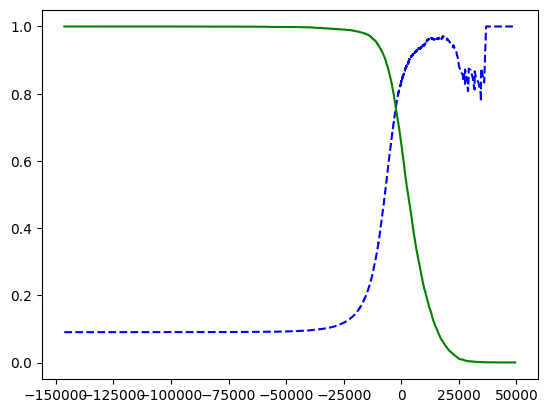

In [46]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


Text(0, 0.5, 'precision')

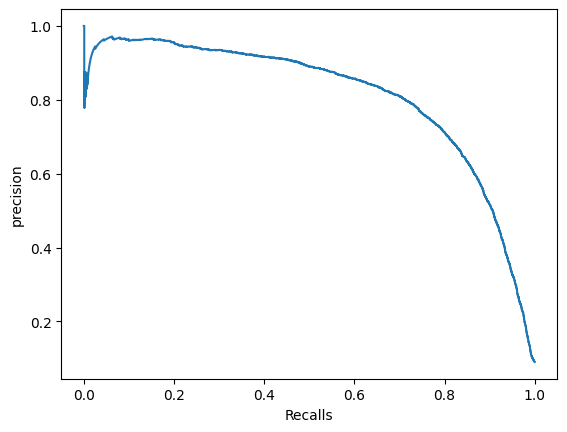

In [65]:
plt.plot(recalls,precisions)
plt.xlabel("Recalls")
plt.ylabel("precision")

In [52]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 

threshold_90_precision

3370.019499143958

In [54]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [56]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [57]:
precision_score(y_train_5, y_train_pred_90)

recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate.

FPR = 1 - TNR

In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

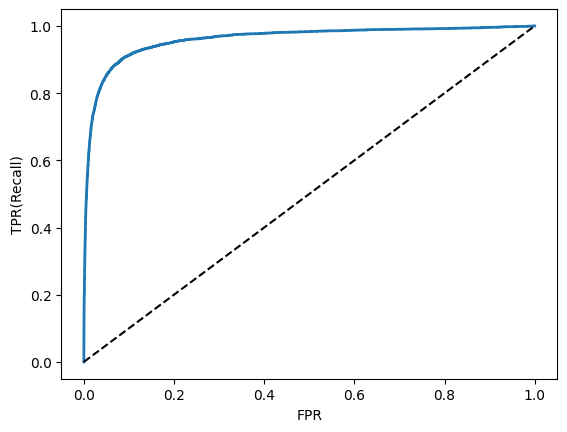

In [62]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel("FPR")
    plt.ylabel("TPR(Recall)")

plot_roc_curve(fpr, tpr)
plt.show()

### Compute the ROC AUC

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)


0.9604938554008616

### Train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier.

In [66]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")


In [68]:
y_probas_forest[0]

array([0.11, 0.89])

In [69]:
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

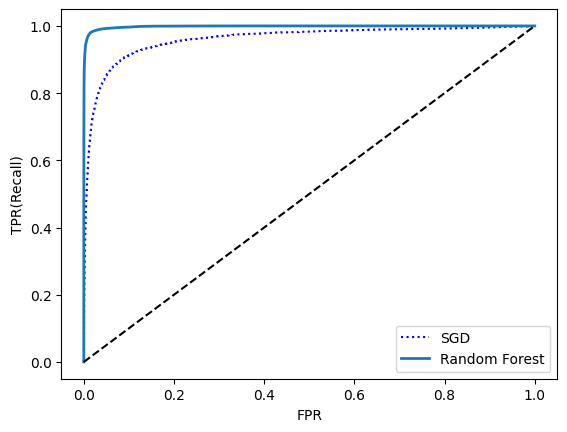

In [70]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [74]:
roc_auc_score(y_train_5, y_scores_forest)

roc_auc_score(y_train_5, y_scores)

0.9604938554008616